First we fetch the Phishing Websites dataset from: https://archive.ics.uci.edu/ml/datasets/phishing+websites and separate the data into input features X and target variable y


In [26]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree  

phishing = fetch_ucirepo(id=327) # fetch dataset


X = phishing.data.features # Extract input features
y = phishing.data.targets # Extract target variable (pishing or legitimate)

Then we split the dataset into training and test sets, using 75% of the data for training and 25% for testing

In [27]:
# Split data into train (75%) and test (25%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=20
)

We create a small decision tree classifier with a max depth of 3 and train it on the training set to predict whether a website is phishing or legitimate

In [28]:
# Create a small decision tree classifier and train it
tree_model = DecisionTreeClassifier(max_depth=2, random_state=20)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

We visualize the trained decision tree to see how it makes predictions.
Each node shows the feature and threshold used for splitting, allowing us to interpret the model and extract manual decision rules.

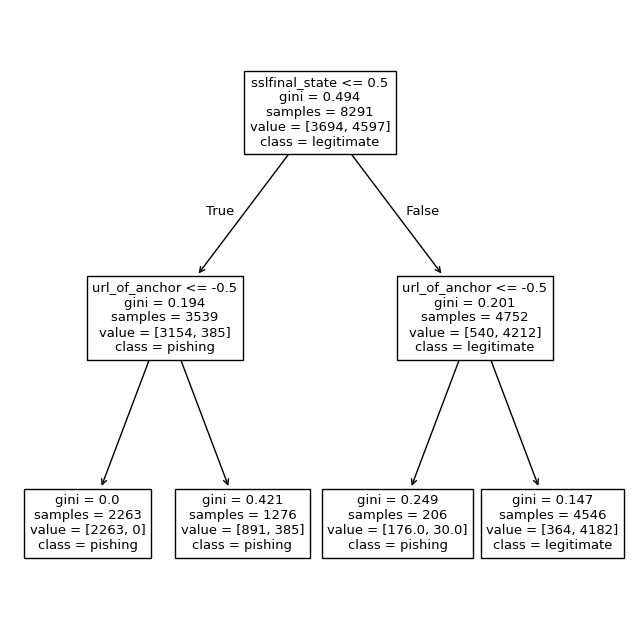

In [29]:
# Visualize the decision tree
fig = plt.figure(figsize = (8, 8))
plot_tree(tree_model, feature_names = X.keys(), class_names = ['pishing', 'legitimate'])
plt.show()

Then we evaluate the decision tree's performance on the test set using classification metrics.
The classification report is converted to a DataFrame to clearly show precision, recall, f1-score, and support for each class.

In [30]:
import pandas as pd
from sklearn.metrics import classification_report

# Convert classification report to DataFrame
report = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
-1,0.880933,0.909468,0.894973,1204.000000
1,0.928337,0.905128,0.916586,1560.000000
accuracy,0.907019,0.907019,0.907019,0.907019
macro avg,0.904635,0.907298,0.905779,2764.000000
weighted avg,0.907688,0.907019,0.907171,2764.000000
